In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape


(10000, 28, 28)

In [6]:
single_image= X_train[0]


In [7]:
single_image.shape


(28, 28)

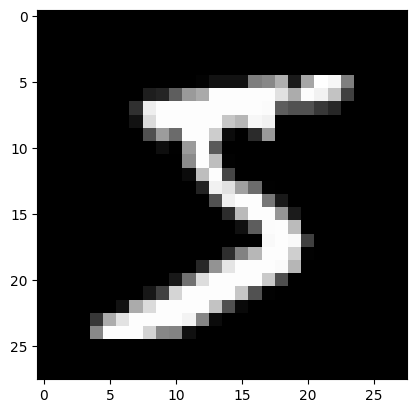

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

X_train_scaled.min()


0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [15]:
type(y_train_onehot)

y_train_onehot.shape


(60000, 10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

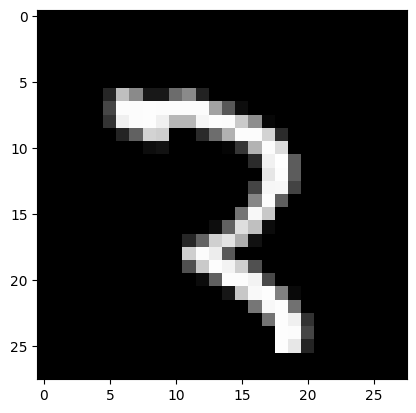

In [16]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

y_train_onehot[500]


In [17]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [18]:
model = keras.Sequential()
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                      

In [19]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

metrics = pd.DataFrame(model.history.history)

metrics.head()


Epoch 1/5
938/938 [==============================] - 73s 76ms/step - loss: 0.1854 - accuracy: 0.9455 - val_loss: 0.0588 - val_accuracy: 0.9808
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.0456 - val_accuracy: 0.9839
Epoch 3/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0434 - val_accuracy: 0.9854
Epoch 4/5
938/938 [==============================] - 67s 72ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0382 - val_accuracy: 0.9878
Epoch 5/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0360 - val_accuracy: 0.9890


,loss,accuracy,val_loss,val_accuracy
0,0.185394,0.945517,0.058831,0.9808
1,0.056411,0.983333,0.045577,0.9839
2,0.038182,0.988300,0.043389,0.9854
3,0.028945,0.990700,0.038192,0.9878
4,0.022480,0.992667,0.035974,0.9890


S.SABARI-212222240085


<Axes: >

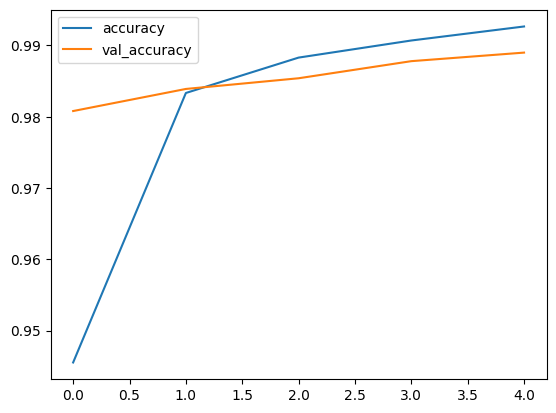

In [24]:
print("S.SABARI-212222240085")
metrics[['accuracy','val_accuracy']].plot()

S.SABARI-212222240085


<Axes: >

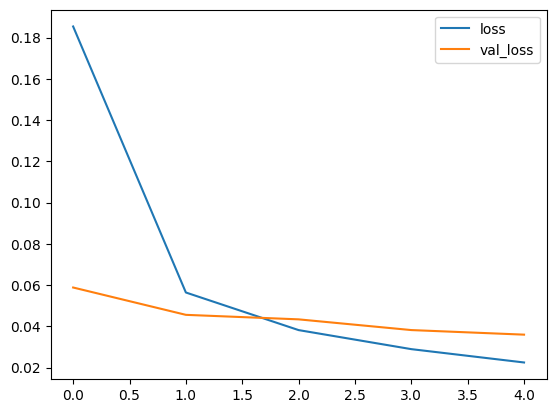

In [23]:
print("S.SABARI-212222240085")
metrics[['loss','val_loss']].plot()

In [22]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 3s 9ms/step


In [25]:
print("S.SABARI-212222240085")
print(confusion_matrix(y_test,x_test_predictions))


S.SABARI-212222240085
[[ 975    0    2    1    0    0    1    0    1    0]
 [   0 1128    0    1    1    0    4    1    0    0]
 [   1    3 1018    0    0    0    0    8    2    0]
 [   0    0    2 1001    0    5    0    1    1    0]
 [   0    0    1    0  969    0    5    0    0    7]
 [   2    0    0    5    0  881    2    0    0    2]
 [   6    2    0    0    1    1  946    0    2    0]
 [   0    2    3    2    0    0    0 1017    1    3]
 [   6    0    2    2    0    1    0    2  957    4]
 [   0    2    0    0    4    2    0    3    0  998]]


In [26]:
print("S.SABARI-212222240085")
print(classification_report(y_test,x_test_predictions))

S.SABARI-212222240085
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
# Prediction for a single input
img = image.load_img('five.png')

In [30]:
type(img)

PIL.Image.Image

In [31]:
img = image.load_img('five.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [32]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 69ms/step


In [33]:
print(x_single_prediction)

[5]


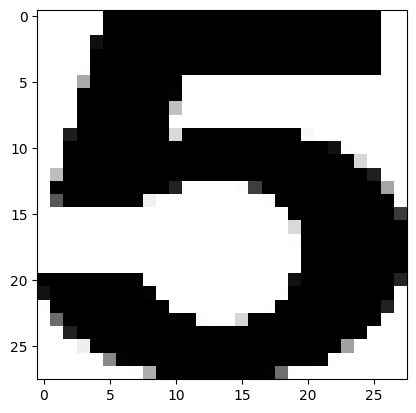

In [34]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [35]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [36]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 27ms/step


In [37]:
print("S.SABARI-212222240085")
print(x_single_prediction)

S.SABARI-212222240085
[5]
